In [ ]:
!pip install ultralytics
!pip install gdown
!gdown 1hUP8gMQ9WQCpvaoPpTxmmIc5n2kUIY73 -O model.pt
!gdown 1yhx5sQtSnYNMZ63XwsOolocLYPd7vOC0 -O head_detect.pt
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt


from ultralytics import YOLO
from PIL import Image
import torch
from PIL import Image
import os
from IPython.display import display


Определение людей с оружием


100%|██████████| 41.6k/41.6k [00:00<00:00, 451kB/s]
image 1/1 /content/Snimok_ekrana_2014-02-24_v_15.50.45.png.jpg: 384x640 1 person_with_gun, 2 person_without_guns, 1497.0ms
Speed: 22.0ms preprocess, 1497.0ms inference, 41.0ms postprocess per image at shape (1, 3, 384, 640)


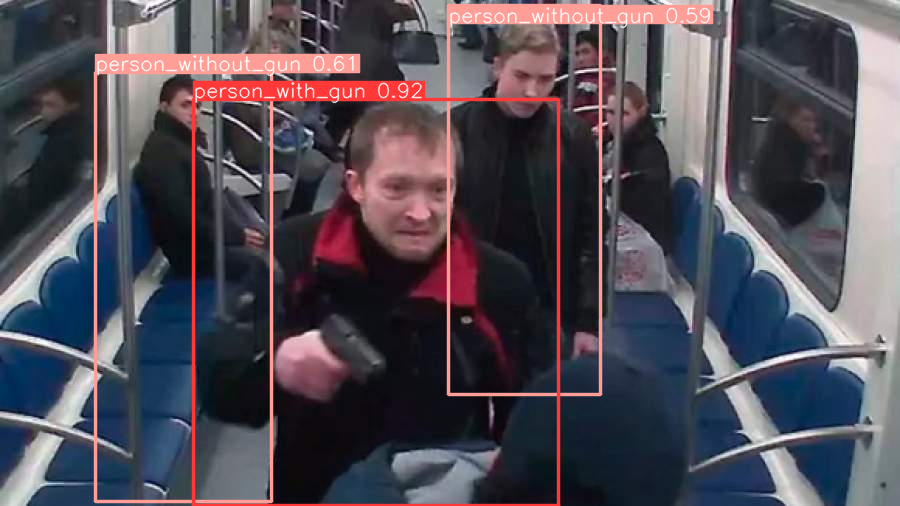

In [2]:
IMG_PATH = "https://cdn.iz.ru/sites/default/files/styles/900x506/public/article-2017-05/Snimok_ekrana_2014-02-24_v_15.50.45.png.jpg"

model = YOLO("model.pt")

results = model(IMG_PATH,conf=0.5)
results[0].save_crop("crop")

res = results[0].plot()[:, :, [2,1,0]]
Image.fromarray(res)


Обнаружение головы человека с оружием



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-10-28 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 308 layers, 21041679 parameters, 0 gradients
Adding AutoShape... 


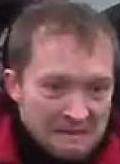

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/head_detect.pt')
imgs = os.listdir("crop/person_with_gun")

for img in imgs:
  img_path = f"crop/person_with_gun/{img}"
  results = model(img_path)

  image_df = results.pandas().xyxy[0].loc[results.pandas().xyxy[0]['name'] == 'head'].to_dict()
  image_coords = {
      key: list(image_df[key].values())[0] for key in ['xmin', 'ymin', 'xmax', 'ymax']
  }

  image = Image.open(img_path)

  xmin = image_coords['xmin']
  ymin = image_coords['ymin']
  xmax = image_coords['xmax']
  ymax = image_coords['ymax']

  cropped_image = image.crop((xmin, ymin, xmax, ymax))
  display(cropped_image)